In [1]:
import h5py
import numpy as np
from constant import *
import matplotlib.pyplot as plt
import torch
from utils import test_dataloader
from torch.autograd import Variable
from sklearn.metrics import *
import seaborn as sns
import pandas as pd

/home/dattran/miniconda2/envs/dat/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


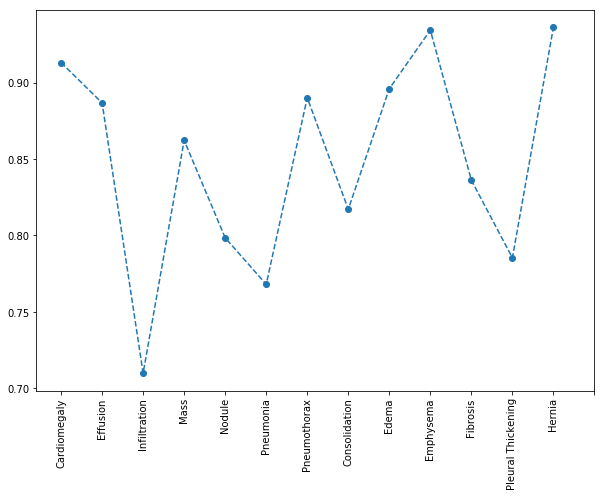

In [26]:
stat_df = pd.read_csv('../stats/test.csv')
stat_df.head()
model_name = '20180501-132749'
performance = stat_df[stat_df.Model == model_name]
plt.figure(figsize=(10, 7))
plt.plot(performance.values[0][2:-1], linestyle='--', marker='o')
x = np.arange(0, 14)
plt.xticks(x, performance.columns.values[2:-1], rotation='vertical');


In [5]:
def plot_learning_curve(models, colors):
    def plot_loss(f, color, comment):
        plt.plot(f['train_loss'].value, c=color, label=comment)
        plt.plot(f['val_loss'].value, c=color, dashes=[6, 2])
    def plot_auc(f, c, comment):
        plt.plot(f['train_auc'].value, c=color, label=comment)
        plt.plot(f['val_auc'].value, c=color, dashes=[2, 6])
    def plot_auc_for_disease(model_name, color, comment):
        performance = stat_df[stat_df.Model == model_name]
        plt.plot(performance.values[0][2:-1], linestyle='--', marker='o', c=color, label=comment)
        
    
    ax1 = plt.figure('loss', figsize=(10, 7))
    ax2 = plt.figure('auc', figsize=(10, 7))
    ax3 = plt.figure('disease', figsize=(10, 7))
    stat_df = pd.read_csv('../stats/test.csv')
    
    # load file
    for (model_name, comment), color in zip(models, colors):
        file_name = '%s/densenet/densenet121/%s/stat.h5' % (LOG_DIR, model_name) 
        f = h5py.File(file_name, 'r')
        plt.figure('loss')
        plot_loss(f, color, comment)
        plt.figure('auc')
        plot_auc(f, color, comment)
        plt.figure('disease')
        plot_auc_for_disease(model_name, color, comment)
    
    plt.figure('loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()
    plt.ylim([0.12, 0.2])
    
    plt.figure('auc')
    plt.title('AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUCs')
    plt.legend()
    
    plt.figure('disease')
    xs = np.arange(0, 14)
    plt.xticks(xs, stat_df.columns.values[2:-1], rotation='vertical')
    plt.ylabel('AUC')
    plt.legend()
    plt.show()

# Plot learning curve 

### 1. Different learning rate
##### epoch: 100, batches: 500, batch_size:32, optim: adam
##### lr = [0.001, 0.01, 0.1]

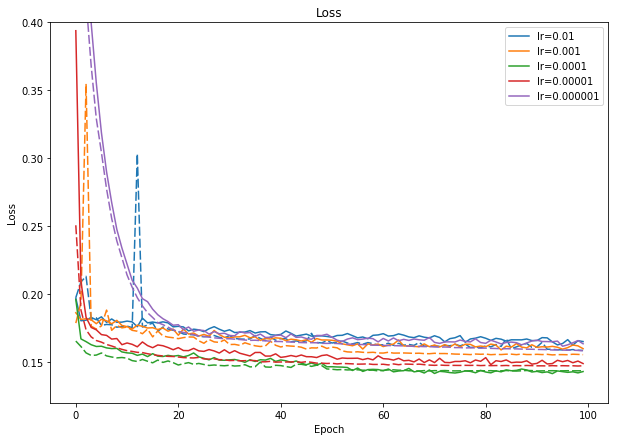

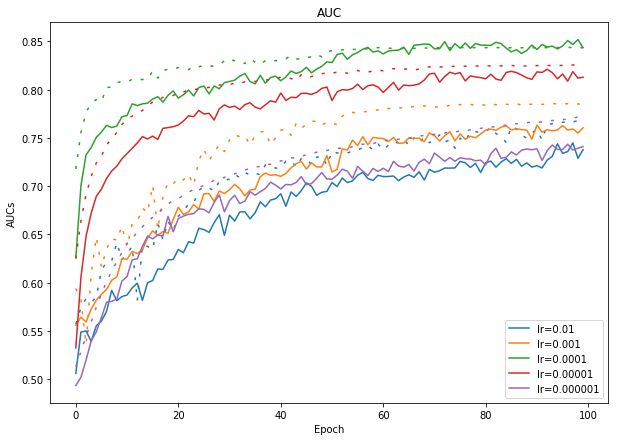

In [10]:
colors = sns.color_palette()
models =[('20180427-230838', 'lr=0.01'), ('20180427-091900', 'lr=0.001'), ('20180429-130928', 'lr=0.0001'), ('20180501-055454', 'lr=0.00001'), ('20180501-055908', 'lr=0.000001')]
plot_learning_curve(models, colors)

### 2. Different batch_size
##### epoch: 100, batches: 500, lr=0.001, optim: adam
##### batch_size: [16, 32, 64, 128]

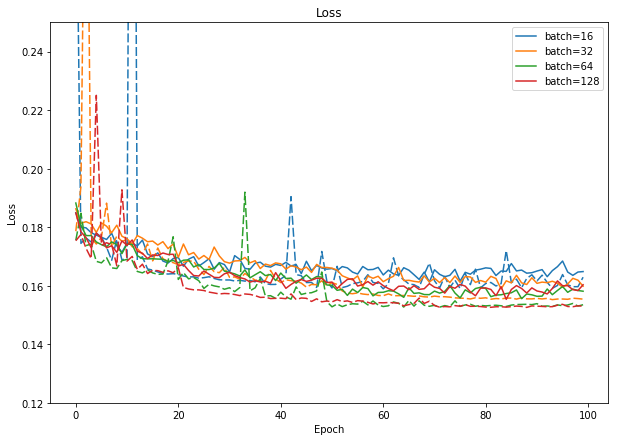

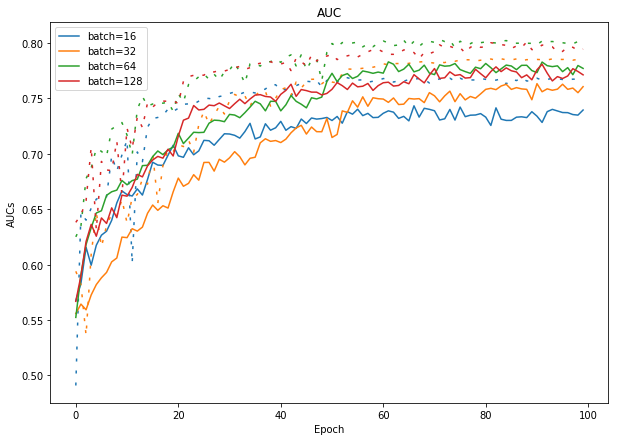

In [10]:
colors = sns.color_palette()
models =[('20180429-131436', 'batch=16'), ('20180427-091900', 'batch=32'), ('20180429-131732', 'batch=64'), ('20180428-111638', 'batch=128')]
plot_learning_curve(models, colors)

### 3. Different epoch
##### batches: 500, batch_size=64, lr=0.0001, optim: adam
##### epoch: [100, 200, 300, 400, 500]

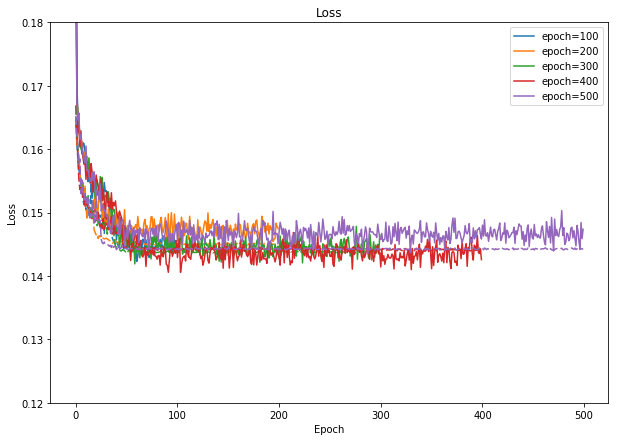

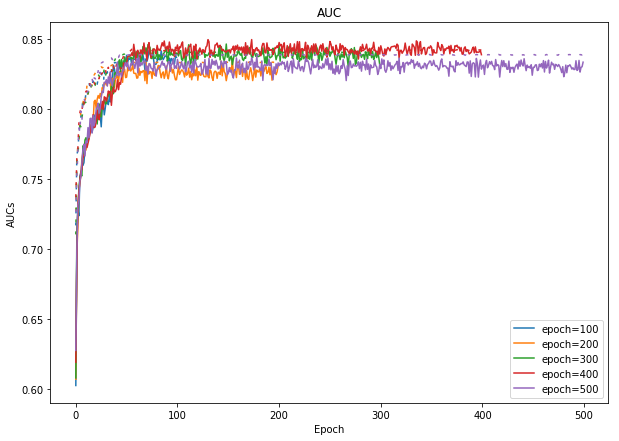

In [8]:
colors = sns.color_palette()
models =[('20180430-162711', 'epoch=100'), ('20180430-113040', 'epoch=200'), ('20180429-200210', 'epoch=300'), ('20180429-200046', 'epoch=400'), ('20180429-195702', 'epoch=500')]
plot_learning_curve(models, colors)

### 4. Different optim
##### epoch: 100, batches: 500, batch_size=64, lr=0.0001,
##### optim: adam, adagrad, adadelta, rmsprop

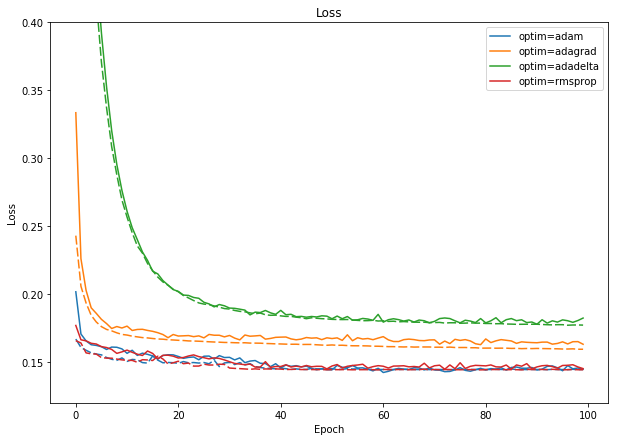

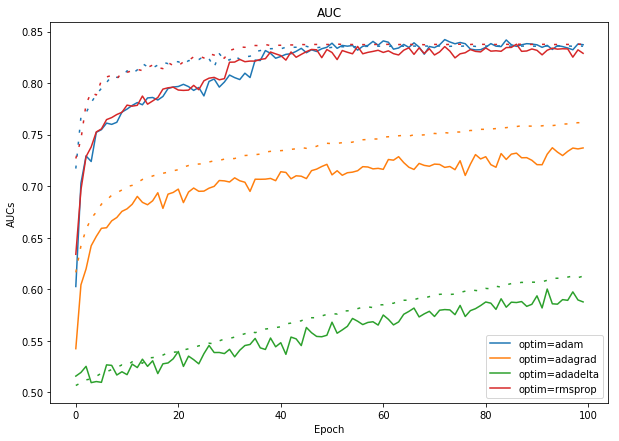

In [7]:
colors = sns.color_palette()
models =[('20180430-162711', 'optim=adam'), ('20180430-213936', 'optim=adagrad'), ('20180430-215023', 'optim=adadelta'), ('20180430-214452', 'optim=rmsprop')]
plot_learning_curve(models, colors)

### 5. Different input size
##### epoch: 100, batches: 500, batch_size=32, lr=0.0001, optim: adam
##### input: [224, 512]

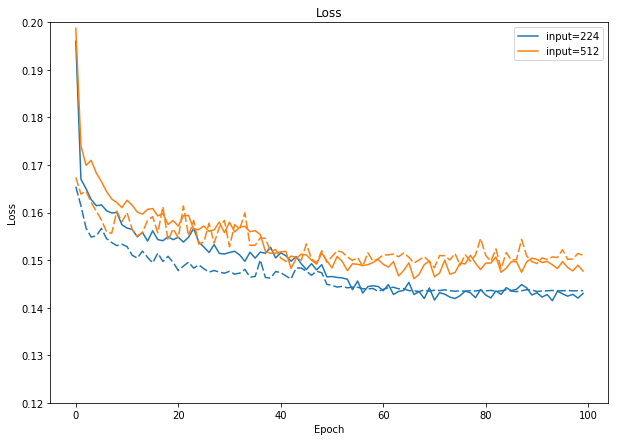

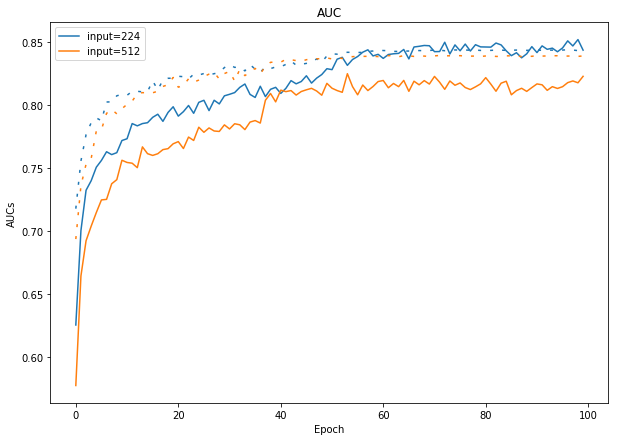

In [13]:
colors = sns.color_palette()
models =[('20180429-130928', 'input=224'), ('20180501-131748', 'input=512')]
plot_learning_curve(models, colors)

### 6. Different architecture

#### 6.1 Densenet
##### epoch: 100, batches: 500, batch_size=32, lr=0.0001, optim: adam
##### Densenet121, Densenet161, Densenet201

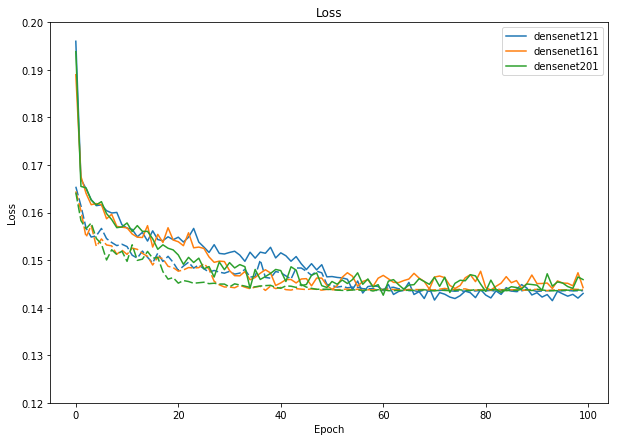

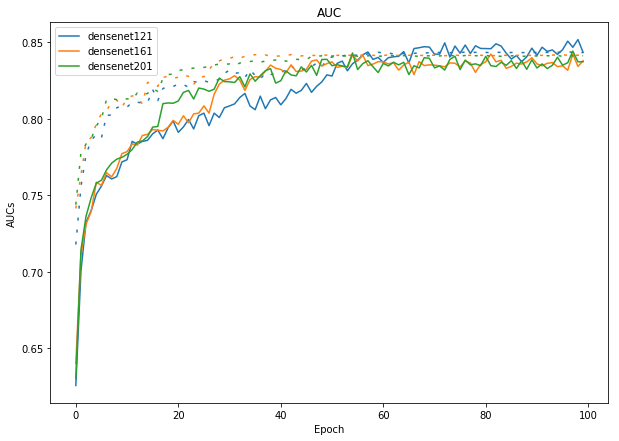

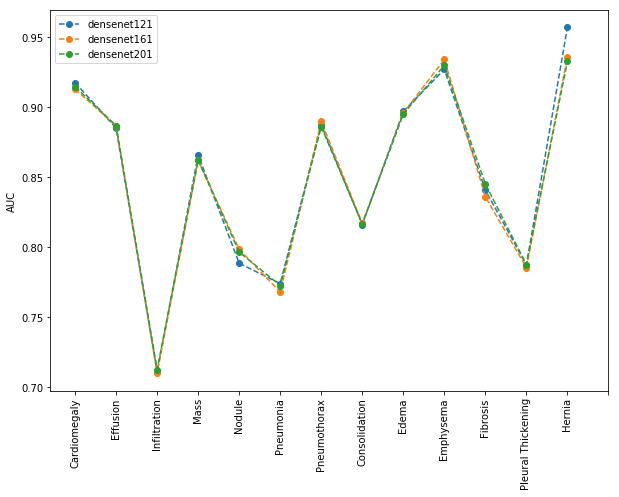

In [31]:
colors = sns.color_palette()
models =[('20180429-130928', 'densenet121'), ('20180501-132749', 'densenet161'), ('20180501-133136', 'densenet201')]
plot_learning_curve(models, colors)

#### 6.2 Resnet
##### epoch: 100, batches: 500, batch_size=32, lr=0.0001, optim: adam
##### Resnet50, resnet101, resnet152

In [ ]:
colors = sns.color_palette()
models =[('20180501-212649', 'resnet50'), ('20180501-212759', 'resnet101'), ('20180501-212852', 'resnet152')]
plot_learning_curve(models, colors)

### 7. Enhance constrast
##### epoch: 100, batches: 500, batch_size=32, lr=0.001, optim: adam

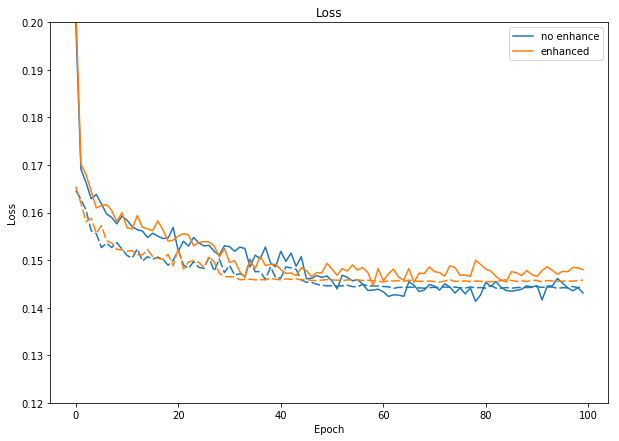

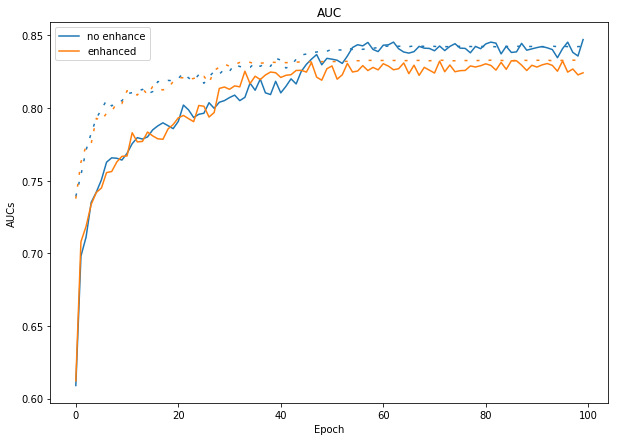

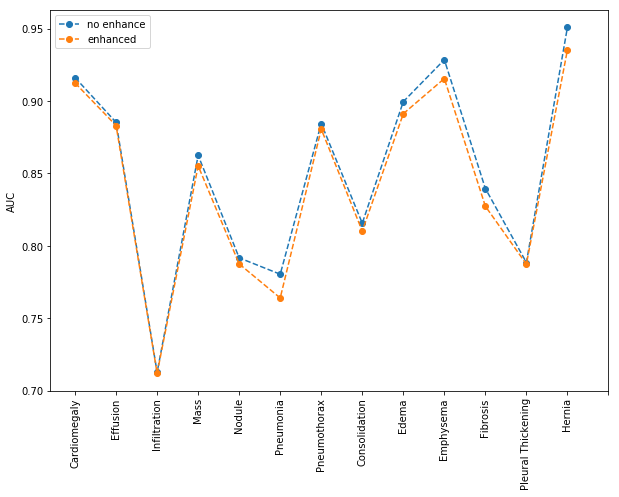

In [6]:
colors = sns.color_palette()
models =[('20180507-214402', 'no enhance'), ('20180508-212037', 'enhanced')]
plot_learning_curve(models, colors)

### 8. Remove noise data
##### epoch: 100, batches: 500, batch_size=32, lr=0.001, optim: adam

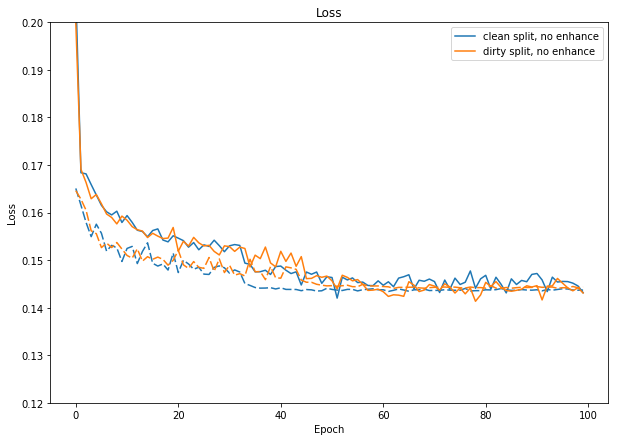

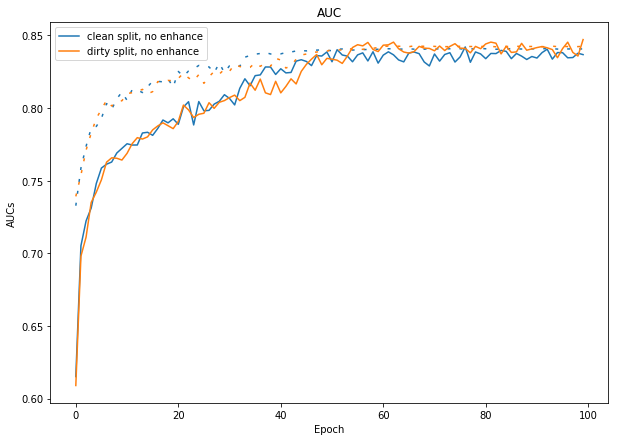

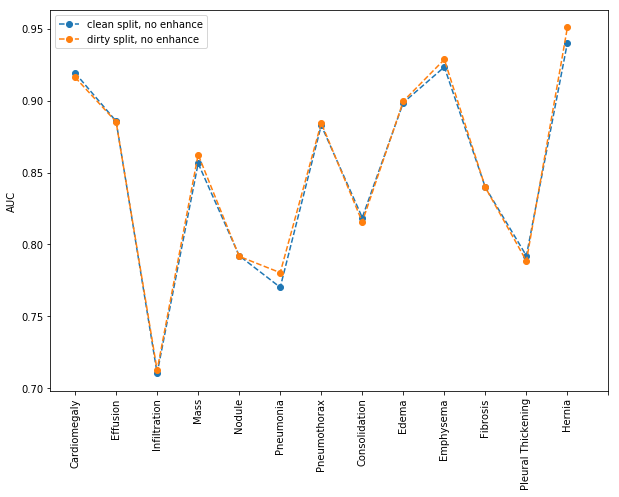

In [8]:
colors = sns.color_palette()
models =[('20180518-231513', 'clean split, no enhance'), ('20180507-214402', 'dirty split, no enhance')]
# ('20180518-163000', 'clean split, enhance'), ('20180508-060957', 'dirty split, enhance')
plot_learning_curve(models, colors)

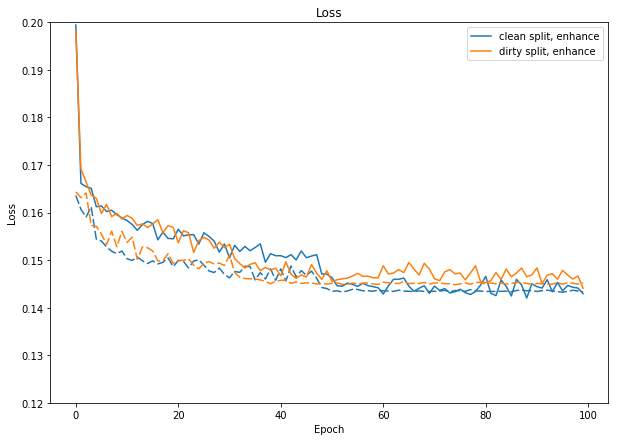

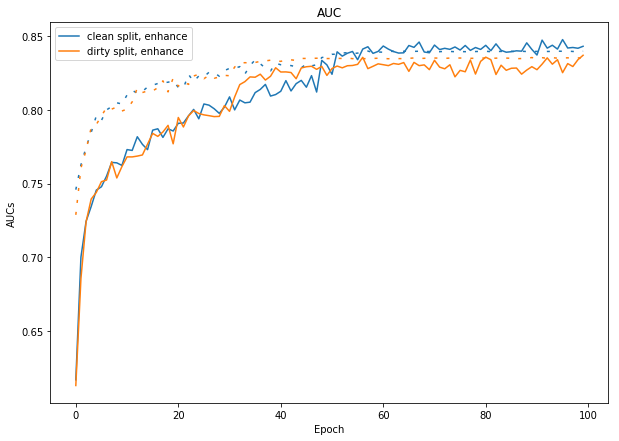

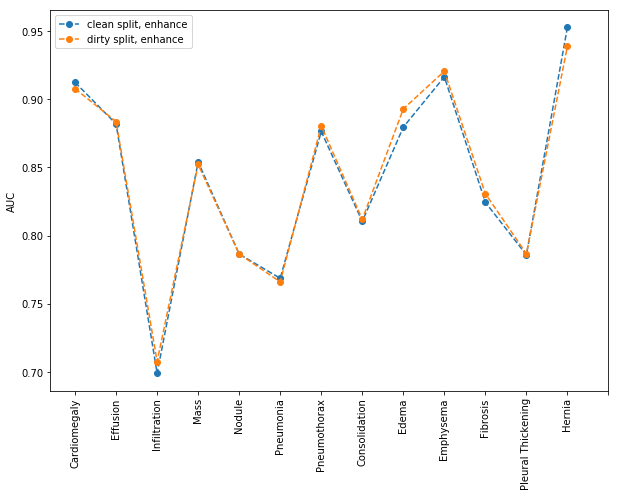

In [9]:
colors = sns.color_palette()
models =[('20180518-163000', 'clean split, enhance'), ('20180508-060957', 'dirty split, enhance')]
plot_learning_curve(models, colors)

# Plot ROC

In [66]:
#TODO: Move ROC code

In [6]:
model_name = '%s/densenet121/%s/model.path.tar' %(MODEL_DIR, '20180422-075022')
net = DenseNet121(14).cuda()
model = torch.nn.DataParallel(net, device_ids=[0]).cuda()
checkpoint = torch.load(model_name)
model.load_state_dict(checkpoint['state_dict'])
dataloader = test_dataloader(image_list_file=CHEXNET_TEST_CSV, percentage=1, agumented=False)

In [7]:
model.eval()
targets = torch.FloatTensor()
targets = targets.cuda()
preds = torch.FloatTensor()
preds = preds.cuda()
    
for data, target in dataloader:
    target = target.cuda()
    data = Variable(data.cuda(), volatile=True)
    pred = model(data)
    targets = torch.cat((targets, target), 0)
    preds = torch.cat((preds, pred.data), 0)


In [8]:
aurocs = []
ytests = targets.cpu().numpy()
yscores = preds.cpu().numpy()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(N_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(targets[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Text(0,0.5,'True positive rate')

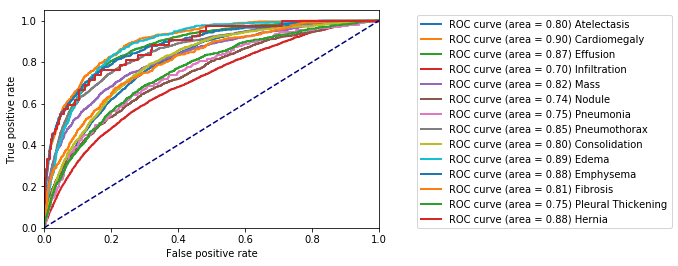

In [9]:
lw= 2
for i in range(N_CLASSES):
    plt.plot(fpr[i], tpr[i], lw=lw,
            label='ROC curve (area = %0.2f) %s' % (roc_auc[i], CLASS_NAMES[i]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(bbox_to_anchor=[1.1, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [13]:
!cat ../csv/chexnet_train_list.csv | wc -l
!cat ../csv/chexnet_val_list.csv | wc -l
!cat ../csv/chexnet_test_list.csv | wc -l

78468
11218
22432


In [70]:
# import torch.nn as nn
# nn.BCELoss?